# Forestfires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [2]:
data= pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data=data.drop(['month','day'],axis=1)

In [4]:
mapping = {'small': 1, 'large': 2}

In [5]:
data = data.replace(mapping)

In [6]:
data.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

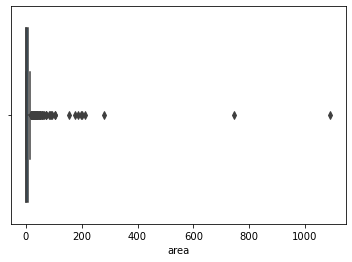

In [7]:
sns.boxplot(data['area'])

In [8]:
corr = data[data.columns[0:11]].corr()

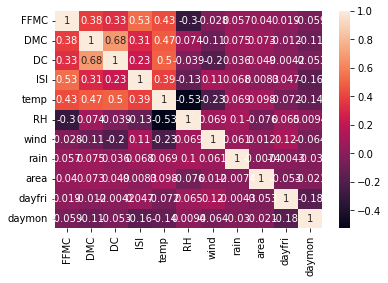

In [9]:
sns.heatmap(corr,annot=True)
plt.show()

In [10]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
x_norm = norm_func(x)

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 2s 13ms/step - loss: 0.5142 - accuracy: 0.7612 - val_loss: 0.3565 - val_accuracy: 0.6371
Epoch 2/120
29/29 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.7716 - val_loss: 0.1028 - val_accuracy: 0.6371
Epoch 3/120
29/29 [==============================] - 0s 3ms/step - loss: 0.1092 - accuracy: 0.7716 - val_loss: -0.1494 - val_accuracy: 0.6371
Epoch 4/120
29/29 [==============================] - 0s 4ms/step - loss: -0.0832 - accuracy: 0.7716 - val_loss: -0.3721 - val_accuracy: 0.6371
Epoch 5/120
29/29 [==============================] - 0s 4ms/step - loss: -0.2407 - accuracy: 0.7716 - val_loss: -0.5656 - val_accuracy: 0.6371
Epoch 6/120
29/29 [==============================] - 0s 3ms/step - loss: -0.3643 - accuracy: 0.7716 - val_loss: -0.7252 - val_accuracy: 0.6371
Epoch 7/120
29/29 [==============================] - 0s 4ms/step - loss: -0.4651 - accuracy: 0.7716 - val_loss: -0.8434 - val_accuracy: 0.6371
Epo

Epoch 58/120
29/29 [==============================] - 0s 3ms/step - loss: -2.1318 - accuracy: 0.7716 - val_loss: -3.4104 - val_accuracy: 0.6371
Epoch 59/120
29/29 [==============================] - 0s 3ms/step - loss: -2.1594 - accuracy: 0.7716 - val_loss: -3.4565 - val_accuracy: 0.6371
Epoch 60/120
29/29 [==============================] - 0s 3ms/step - loss: -2.1886 - accuracy: 0.7716 - val_loss: -3.4987 - val_accuracy: 0.6371
Epoch 61/120
29/29 [==============================] - 0s 3ms/step - loss: -2.2164 - accuracy: 0.7716 - val_loss: -3.5429 - val_accuracy: 0.6371
Epoch 62/120
29/29 [==============================] - 0s 3ms/step - loss: -2.2439 - accuracy: 0.7716 - val_loss: -3.5907 - val_accuracy: 0.6371
Epoch 63/120
29/29 [==============================] - 0s 3ms/step - loss: -2.2732 - accuracy: 0.7716 - val_loss: -3.6345 - val_accuracy: 0.6371
Epoch 64/120
29/29 [==============================] - 0s 3ms/step - loss: -2.3015 - accuracy: 0.7716 - val_loss: -3.6786 - val_accuracy:

Epoch 115/120
29/29 [==============================] - 0s 2ms/step - loss: -3.7561 - accuracy: 0.7716 - val_loss: -5.9933 - val_accuracy: 0.6371
Epoch 116/120
29/29 [==============================] - 0s 2ms/step - loss: -3.7849 - accuracy: 0.7716 - val_loss: -6.0373 - val_accuracy: 0.6371
Epoch 117/120
29/29 [==============================] - 0s 2ms/step - loss: -3.8129 - accuracy: 0.7716 - val_loss: -6.0840 - val_accuracy: 0.6371
Epoch 118/120
29/29 [==============================] - 0s 3ms/step - loss: -3.8424 - accuracy: 0.7716 - val_loss: -6.1267 - val_accuracy: 0.6371
Epoch 119/120
29/29 [==============================] - 0s 2ms/step - loss: -3.8705 - accuracy: 0.7716 - val_loss: -6.1731 - val_accuracy: 0.6371
Epoch 120/120
29/29 [==============================] - 0s 2ms/step - loss: -3.8994 - accuracy: 0.7716 - val_loss: -6.2189 - val_accuracy: 0.6371


In [18]:
result = model.evaluate(x=x_test,y=y_test)
result

4/4 [==============================] - 0s 2ms/step - loss: -4.6135 - accuracy: 0.7308


[-4.613508701324463, 0.7307692170143127]

In [19]:
print('Model Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model Accuracy :  0.73
Loss           :  -4.61
